In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
 # Extraire les dossiers des images


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
from shutil import copy2
import csv


In [ ]:
print('total training alphabets:', len(os.listdir('/content/gdrive/My Drive/ASL Data/Training')))

total training alphabets: 29


In [ ]:

try:
  # The %tensorflow_version magic only works in colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
!pip install tensorflow_hub



In [ ]:
import tensorflow_hub as hub

tf.__version__

'2.5.0'

In [ ]:
import pandas as pd

# Increase precision of presented data for better side-by-side comparison
pd.set_option("display.precision", 8)

data_root = '/content/gdrive/My Drive/ComputerVisionDataASL/training'

IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)

datagen_kwargs = dict(rescale=1./255, validation_split=.20) #rescale + split validation ;to rescale the image and split data into training and validation.
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs,rotation_range=5,
 zoom_range=0.5,
 horizontal_flip=False,
 vertical_flip=True,
 fill_mode='nearest') # data augmentation
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="validation", 
    shuffle=True, #try shuffel false
    target_size= IMAGE_SHAPE 
)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="training", 
    shuffle=True,
    target_size=IMAGE_SHAPE)

Found 175 images belonging to 29 classes.
Found 704 images belonging to 29 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape
# (32, 244, 244, 3) means in one batch of images consist of 32 images and 244, 244 is height and width of images and 3 is RGB three colour channels.
# label_batch shape is (32, 4) means there are 32 labels and 4 because the labels are in one hot encoded format.

((32, 224, 224, 3), (32, 29))

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


In [ ]:
!cat labels.txt

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
del
nothing
space

In [ ]:
print (train_generator.class_indices)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


In [ ]:
IMAGE_SIZE = 224
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=True),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])    # architecture mobilenet v2 and 
model.build([None, 224, 224, 3])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 29)                37149     
Total params: 2,295,133
Trainable params: 2,261,021
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.SGD (learning_rate=1e-3)

model.compile(
  optimizer=optimizer,
  loss='categorical_crossentropy',
  metrics=['acc'])

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

hist = model.fit(
    train_generator, 
    epochs=30,
    batch_size = 29,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch).history

Epoch 1/30
22/22 [==============================] - 226s 10s/step - loss: 3.8611 - acc: 0.0497 - val_loss: 3.7692 - val_acc: 0.0514
Epoch 2/30
22/22 [==============================] - 133s 6s/step - loss: 3.5740 - acc: 0.0795 - val_loss: 3.6009 - val_acc: 0.0629
Epoch 3/30
22/22 [==============================] - 133s 6s/step - loss: 3.2112 - acc: 0.1264 - val_loss: 3.4391 - val_acc: 0.0971
Epoch 4/30
22/22 [==============================] - 131s 6s/step - loss: 2.9884 - acc: 0.1634 - val_loss: 3.2573 - val_acc: 0.1429
Epoch 5/30
22/22 [==============================] - 130s 6s/step - loss: 2.7390 - acc: 0.2628 - val_loss: 3.1216 - val_acc: 0.1657
Epoch 6/30
22/22 [==============================] - 130s 6s/step - loss: 2.4970 - acc: 0.3423 - val_loss: 2.9642 - val_acc: 0.2000
Epoch 7/30
22/22 [==============================] - 130s 6s/step - loss: 2.2834 - acc: 0.4219 - val_loss: 2.8370 - val_acc: 0.2457
Epoch 8/30
22/22 [==============================] - 129s 6s/step - loss: 2.1458 - 

In [ ]:
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,50])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

In [ ]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [ ]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'Del' 'Nothing' 'Space']


In [ ]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (32, 29)


In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['V' 'E' 'Y' 'A' 'C' 'B' 'T' 'K' 'R' 'R' 'V' 'T' 'G' 'G' 'Space' 'K'
 'Space' 'R' 'K' 'C' 'K' 'Space' 'R' 'R' 'V' 'Z' 'D' 'Z' 'A' 'R' 'Q' 'F']


(32, 224, 224, 3)


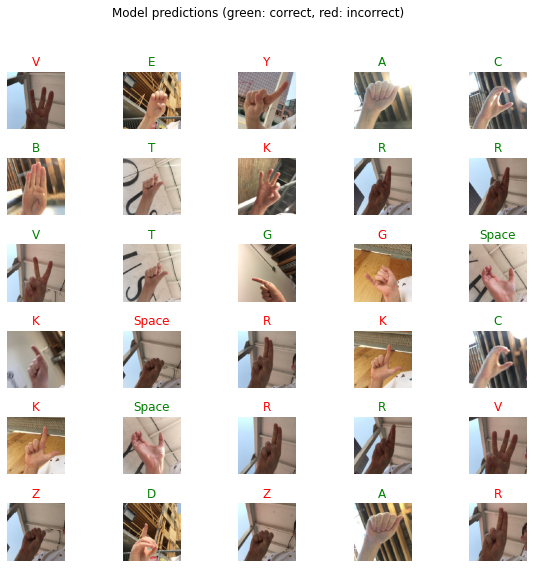

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")
print(val_image_batch.shape)

In [ ]:
model.save("ASL6.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 29)                37149     
Total params: 2,295,133
Trainable params: 2,261,021
Non-trainable params: 34,112
_________________________________________________________________


*texte en italique* 


# ***model .h5 and predict***

In [ ]:
from tensorflow import keras
import tensorflow_hub as hub 
model = keras.models.load_model('/content/ASL6.h5', custom_objects={'KerasLayer': hub.KerasLayer})

In [ ]:
model.metrics_names #nthabet w bara 


['loss', 'acc']

In [ ]:
from keras.preprocessing import image
import numpy as np

test_image = image.load_img('/content/gdrive/My Drive/ComputerVisionDataASL/training/space/space0002_test.jpg', target_size=(224, 224))

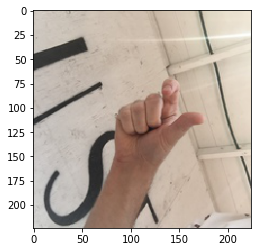

27 nothing
[27 27]
27
nothing


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:

from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 224,224

# load the model we saved
model = keras.models.load_model('/content/ASL6.h5', custom_objects={'KerasLayer': hub.KerasLayer})
#model = load_model('/content/haja.h5')
# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# predicting images
img = image.load_img('/content/gdrive/My Drive/ComputerVisionDataASL/training/T/T0005_test.jpg', target_size=(img_width, img_height))


x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img.show()

plt.imshow(img)
plt.show()

images = np.vstack([x])
classes = np.argmax(model.predict(x), axis=-1)
class_names={'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
predicted_name =list( class_names.keys())
print(classes[0], predicted_name[classes[0]])

# # predicting multiple images at once
img2 = image.load_img('/content/gdrive/My Drive/ComputerVisionDataASL/training/A/A0005_test.jpg', target_size=(img_width, img_height))
y = image.img_to_array(img2)
y = np.expand_dims(y, axis=0)

# # pass the list of multiple images np.vstack()
images = np.vstack([x, y])
classes = model.predict_classes(images, batch_size=10)

# # print the classes, the images belong to
# 
print (classes)
#
print (classes[0])
#
print (predicted_name[classes[0]])
